# MNIST

In [2]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

In [3]:
# Data paths
Train_images = "/Users/rosagradilla/Documents/DS_II/machine_learning/lab1/MNIST_data/train-images.idx3-ubyte"
Train_labels = "/Users/rosagradilla/Documents/DS_II/machine_learning/lab1/MNIST_data/train-labels.idx1-ubyte"

Test_images = "/Users/rosagradilla/Documents/DS_II/machine_learning/lab1/MNIST_data/t10k-images.idx3-ubyte"
Test_labels = "/Users/rosagradilla/Documents/DS_II/machine_learning/lab1/MNIST_data/t10k-labels.idx1-ubyte"

In [4]:
# Reading data

train_img, train_lbl = loadlocal_mnist(images_path = Train_images, labels_path=Train_labels)
test_img, test_lbl = loadlocal_mnist(images_path = Test_images, labels_path = Test_labels)

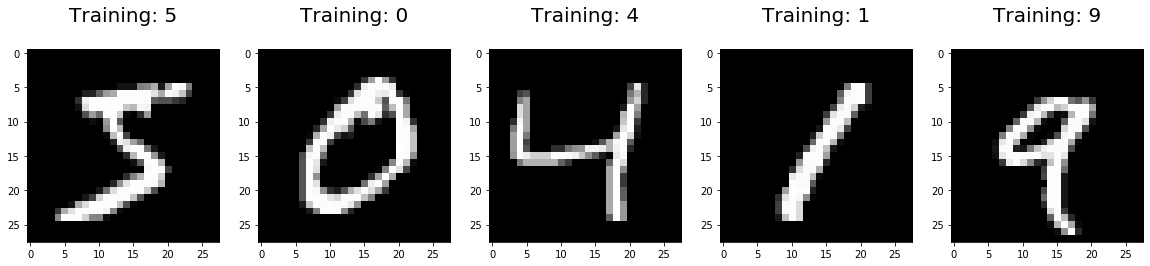

In [5]:
# Showing images and labels

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
# Making an instance of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [7]:
logisticRegr.fit(train_img, train_lbl)

/Users/rosagradilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Predict for one observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [9]:
# Predict for multiple observations
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [10]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

## Measuring Model Performance

Accuracy is defined as:

fraction of correct predictions = correct predictions/ total number of data points

In [11]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9255


## Display Misclassified images with Predicted Labels

Get the indices of the misclassified images

In [12]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

The following code should show misclassified images, however due to an error in code, its showing properly classified images.

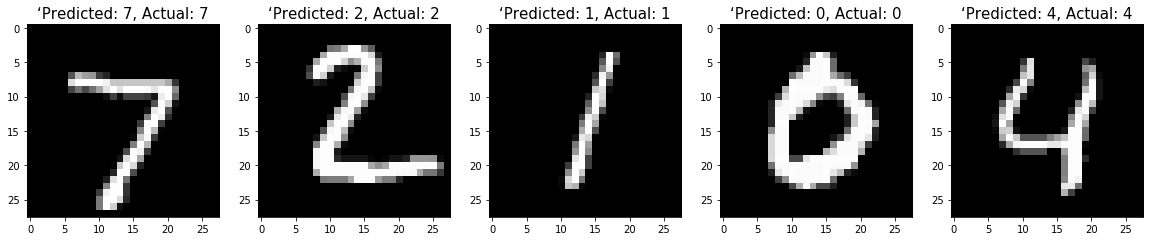

In [13]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('‘Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

The chunk below fixes the issue by pulling the incrementation out of the if statement.

In [14]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

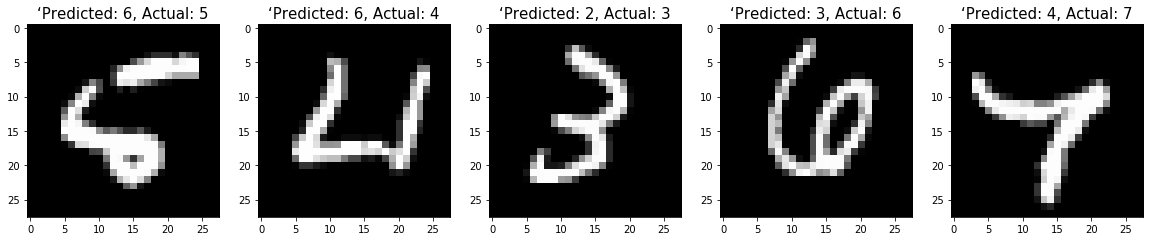

In [15]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('‘Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Confusion Matrix

In [16]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


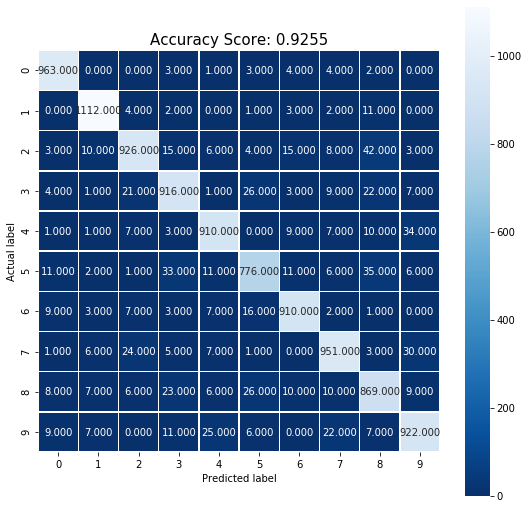

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Improving the model

I order to improve the score we added some new features:

- The flipped imaged
- The image transposed
- The difference between the image and the flipped version

In [18]:
# here we add the features to the training data

flipped = []
transposed = []

for image in train_img:
    x = np.transpose(image)
    transposed.append(x)
    
for image in train_img:
    x=np.flip(image)
    flipped.append(x)

In [19]:
difference = train_img - flipped

transposed = np.array(transposed)
flipped = np.array(flipped)

features = np.hstack((train_img, transposed, flipped, difference))
features_np = np.array(features)

features_np.shape

(60000, 3136)

In [20]:
# and fit the model

test = logisticRegr.fit(features_np, train_lbl)

/Users/rosagradilla/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
# Here we add the new features to the test data

transposed_test = []
flipped_test = []

for image in test_img:
    x = np.transpose(image)
    transposed_test.append(x)
    
for image in test_img:
    x=np.flip(image)
    flipped_test.append(x)

In [22]:
difference_test = test_img - flipped_test

transposed_test = np.array(transposed_test)
flipped_test = np.array(flipped_test)

features_test = np.hstack((test_img, transposed_test, flipped_test, difference_test))
features_test_np = np.array(features_test)

features_test_np.shape

(10000, 3136)

In [23]:
# and compute the score after adding the new features

score = test.score(features_test_np, test_lbl)
print(score)

0.928


We improved our score from 0.9255 to 0.928

### Confusion Matrix for Improved Model

In [25]:
# Make predictions on entire test data
predictions_imp = test.predict(features_test_np)

In [27]:
cm2 = metrics.confusion_matrix(test_lbl, predictions_imp)
print(cm2)

[[ 954    0    2    5    1    4   11    0    2    1]
 [   0 1118    3    1    1    2    5    0    4    1]
 [   4   11  943    9    9    5   11    9   27    4]
 [   4    0   19  923    2   25    5   12   14    6]
 [   1    2    6    0  915    0   10    7    5   36]
 [   7    3    4   40    7  779   15    4   30    3]
 [   5    2    8    1    6   19  910    2    5    0]
 [   1    3   16   10    8    1    0  949    5   35]
 [   6    7   10   24    6   23   10    8  867   13]
 [   6    6    2   10   21   11    0   22    9  922]]


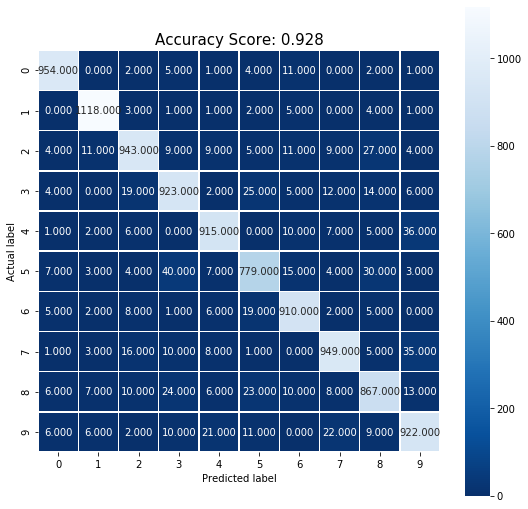

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True,
           cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

We can see that 5 and 8 both improved in accuracy